In [1]:
import pandas as pd
import re
from langdetect import detect, LangDetectException, DetectorFactory
DetectorFactory.seed = 0


In [2]:
# Load the dataset

df = pd.read_csv(r"C:\Users\erica\Downloads\PhiUSIIL_Phishing_URL_Dataset.csv")

# Drop the "FILENAME" column
df = df.drop(columns=["FILENAME"], errors="ignore")

# Show the basic structure of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235795 entries, 0 to 235794
Data columns (total 55 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   URL                         235795 non-null  object 
 1   URLLength                   235795 non-null  int64  
 2   Domain                      235795 non-null  object 
 3   DomainLength                235795 non-null  int64  
 4   IsDomainIP                  235795 non-null  int64  
 5   TLD                         235795 non-null  object 
 6   URLSimilarityIndex          235795 non-null  float64
 7   CharContinuationRate        235795 non-null  float64
 8   TLDLegitimateProb           235795 non-null  float64
 9   URLCharProb                 235795 non-null  float64
 10  TLDLength                   235795 non-null  int64  
 11  NoOfSubDomain               235795 non-null  int64  
 12  HasObfuscation              235795 non-null  int64  
 13  NoOfObfuscated

In [3]:
def process_text(text):
    text=text.lower() #make all lowercase
    text=text.strip() #remove leading and trailing whitespace
    text=re.sub(r'[0-9]+', '', text) # remove digits
    return text

df['Title_Cleaned']=df['Title'].apply(process_text)

In [4]:
def detect_language(title):
    try: 
        if len(title)>0 and pd.isna(title)==False:
            return detect(title)
        else:
            return 'N/A'
    except LangDetectException:
        return 'Unknown'
    
df['Language']=df['Title_Cleaned'].apply(detect_language)
df


,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,...,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label,Title_Cleaned,Language
0,https://www.southbankmosaics.com,31,www.southbankmosaics.com,24,0,com,100.000000,1.000000,0.522907,0.061933,...,1,34,20,28,119,0,124,1,à¸‚à¹ˆà¸²à¸§à¸ªà¸” à¸‚à¹ˆà¸²à¸§à¸§à¸±à¸™à¸™à¸µ...,vi
1,https://www.uni-mainz.de,23,www.uni-mainz.de,16,0,de,100.000000,0.666667,0.032650,0.050207,...,1,50,9,8,39,0,217,1,johannes gutenberg-universitã¤t mainz,de
2,https://www.voicefmradio.co.uk,29,www.voicefmradio.co.uk,22,0,uk,100.000000,0.866667,0.028555,0.064129,...,1,10,2,7,42,2,5,1,voice fm southampton,en
3,https://www.sfnmjournal.com,26,www.sfnmjournal.com,19,0,com,100.000000,1.000000,0.522907,0.057606,...,1,3,27,15,22,1,31,1,home page: seminars in fetal and neonatal medi...,it
4,https://www.rewildingargentina.org,33,www.rewildingargentina.org,26,0,org,100.000000,1.000000,0.079963,0.059441,...,1,244,15,34,72,1,85,1,fundaciã³n rewilding argentina,en
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235790,https://www.skincareliving.com,29,www.skincareliving.com,22,0,com,100.000000,1.000000,0.522907,0.058739,...,1,51,7,21,187,2,191,1,skincareliving,sl
235791,https://www.winchester.gov.uk,28,www.winchester.gov.uk,21,0,uk,100.000000,0.785714,0.028555,0.053834,...,0,50,1,7,88,0,31,1,winchestergov,en
235792,https://www.nononsensedesign.be,30,www.nononsensedesign.be,23,0,be,100.000000,1.000000,0.003319,0.063093,...,1,27,10,30,58,2,67,1,nononsensedesign,it
235793,https://patient-cell-40f5.updatedlogmylogin.wo...,55,patient-cell-40f5.updatedlogmylogin.workers.dev,47,0,dev,28.157537,0.465116,0.000961,0.050211,...,0,0,0,3,0,0,0,0,patient-cell-fupdatedlogmyloginworkers,nl


In [5]:
df['Language'].unique()


array(['vi', 'de', 'en', 'it', 'af', 'N/A', 'sk', 'pt', 'sv', 'sw', 'es',
       'sq', 'ca', 'fr', 'fi', 'pl', 'da', 'tl', 'ro', 'tr', 'hr', 'cy',
       'sl', 'id', 'lt', 'no', 'hu', 'so', 'cs', 'nl', 'lv', 'et',
       'Unknown'], dtype=object)

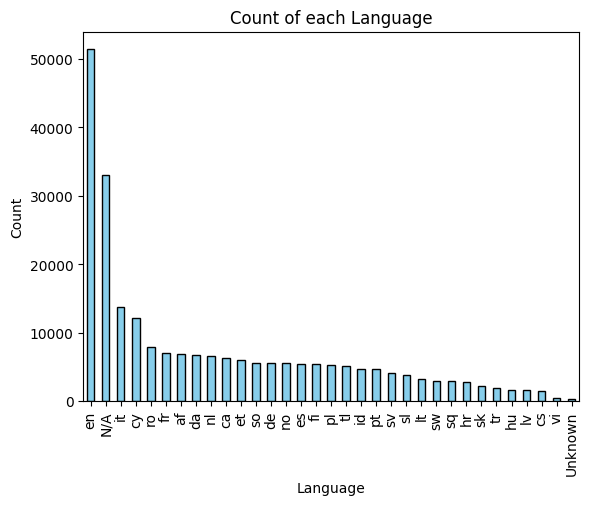

In [6]:
import matplotlib.pyplot as plt

language_counts=df['Language'].value_counts()
language_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Count of each Language')
plt.xlabel('Language')
plt.ylabel('Count')
plt.show()


In [7]:
df.to_csv(r'PhiUSIIL_Phishing_URL_Dataset_lang.csv')